# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries

import scipy
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
sample_size = [10, 50, 500, 5000]

a = np.random.normal(0, 1, size=sample_size[0])
b = np.random.normal(2, 1, size=sample_size[1])
c = np.random.normal(2, 1, size=sample_size[2])
d = np.random.normal(2, 1, size=sample_size[3])

x = np.concatenate((a, b, c, d))
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))


p = 3.27207e-11

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.493258
The null hypothesis can be rejected


#### Interpret the normaltest results and make your observations.

# Explain the test results here

Cuando p es menor que alpha, hay evidencia para rechazar la hipótesis nula.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([  7.,   5.,   6.,  20.,  33.,  74., 123., 165., 285., 364., 463.,
        518., 584., 546., 474., 447., 326., 228., 134.,  92.,  61.,  26.,
         13.,   3.,   3.]),
 array([-1.5725226 , -1.2923325 , -1.0121424 , -0.7319523 , -0.45176219,
        -0.17157209,  0.10861801,  0.38880811,  0.66899822,  0.94918832,
         1.22937842,  1.50956853,  1.78975863,  2.06994873,  2.35013883,
         2.63032894,  2.91051904,  3.19070914,  3.47089924,  3.75108935,
         4.03127945,  4.31146955,  4.59165965,  4.87184976,  5.15203986,
         5.43222996]),
 <a list of 25 Patch objects>)

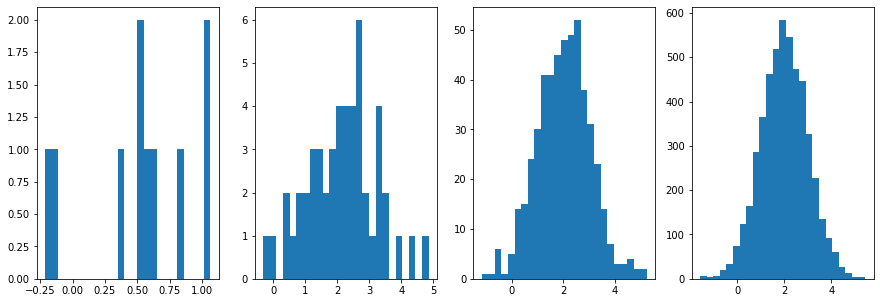

In [12]:
# Your code here

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
plt.hist(a, bins=25)

plt.subplot(1,4,2)
plt.hist(b, bins=25)

plt.subplot(1,4,3)
plt.hist(c, bins=25)

plt.subplot(1,4,4)
plt.hist(d, bins=25)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [13]:
# Your comment and explanation here
#La distribución se normaliza cuanto mayor es la muestra.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

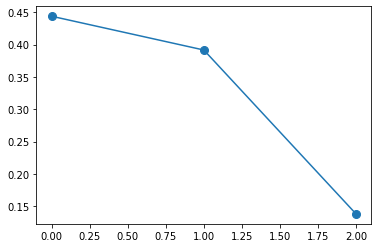

In [4]:
fig, ax = plt.subplots(1, 1)

n = 5
p = 0.15

x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'o-', ms=8, label='binom pmf')

plt.show()

#### Explain what you observe from the plot above

In [5]:
# Your comment here

#### Now plot PMF with 50, 500, and 5000 visitors.

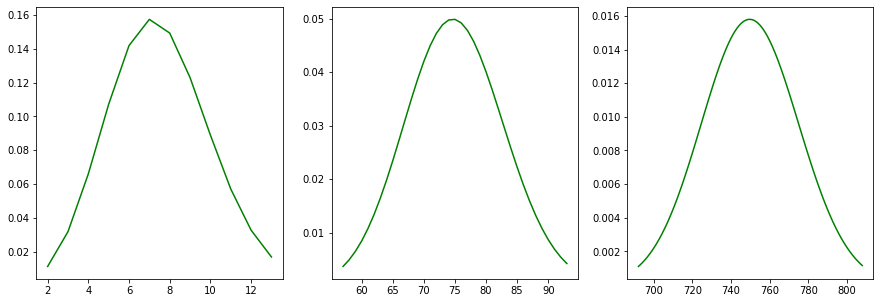

In [6]:
# Your code here

fig, ax = plt.subplots(1, 3)
sizes, p = [50,500,5000], 0.15
fig.set_size_inches(15,5)

i=0
for n in sizes:
    x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
    ax[i].plot(x, binom.pmf(x, n, p), '-', color='green')
    i+=1
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [7]:
#A mayortamaño muestral, más se normaliza la distribución.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [8]:
#La probabilidad de que ocurra un número de eventos en un intervalo temporal.
# La probabilidad de que se dé ese número de eventos exacto, (?) en vez de que se dé esa condición 
#como mínimo una vez (como en la binomial).

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [9]:
x= 320
mu = 300
prob = poisson.cdf(x, mu)
prob

0.8809955143948803

#### What is the probability of getting 60 visits?

In [10]:
x= 320
mu = 60
prob = poisson.cdf(x, mu)
prob

1.0

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

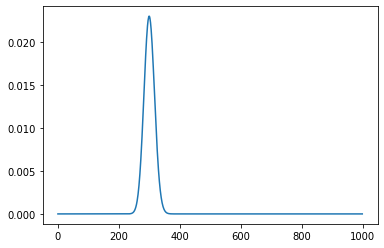

In [11]:
fig, ax = plt.subplots(1, 1)

mu=300

x = np.arange(1000)
ax.plot(x, poisson.pmf(x, mu), '-')
plt.show()